In [2]:
import numpy as np
import pandas as pd


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\admin\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\admin\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\admin\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\admin\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [9]:
df = pd.read_csv('Reviews.csv')

In [11]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# Tqdm is a Python library that provides fast, extensible progress bars for loops and iterables
from tqdm import tqdm
import os

In [13]:
df.shape

(568454, 10)

In [15]:
df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [17]:
def separation(x):
    if x<3:
        return 'negative'
    elif x==3:
        return 'neutral'
    else:
        return 'positive'

In [19]:
df['Score'] = df['Score'].map(separation)

In [21]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# DATA CLEANING

In [23]:
print(df.isnull().sum())

df = df.dropna()
print(df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [25]:
df.shape

(568401, 10)

In [27]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [29]:
df = df.sort_values('ProductId', axis = 0, ascending = True)

In [31]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150524,150525,0006641040,A2QID6VCFTY51R,Rick,1,2,positive,1025481600,"In December it will be, my snowman's anniversa...","My daughter loves all the ""Really Rosie"" books..."
150510,150511,0006641040,A1C9K534BCI9GO,Laura Purdie Salas,0,0,positive,1344211200,Charming and childlike,"A charming, rhyming book that describes the ci..."
150511,150512,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,positive,1338249600,Must have.,I set aside at least an hour each day to read ...
150512,150513,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,positive,1325721600,A classic,I remembered this book from my childhood and g...
150513,150514,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,positive,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations....


In [33]:
df.shape

(568401, 10)

In [35]:
df = df.drop_duplicates(['UserId', 'Time', 'Text'])

In [37]:
df.shape

(393873, 10)

In [39]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150524,150525,0006641040,A2QID6VCFTY51R,Rick,1,2,positive,1025481600,"In December it will be, my snowman's anniversa...","My daughter loves all the ""Really Rosie"" books..."
150510,150511,0006641040,A1C9K534BCI9GO,Laura Purdie Salas,0,0,positive,1344211200,Charming and childlike,"A charming, rhyming book that describes the ci..."
150511,150512,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,positive,1338249600,Must have.,I set aside at least an hour each day to read ...
150512,150513,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,positive,1325721600,A classic,I remembered this book from my childhood and g...
150513,150514,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,positive,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations....
...,...,...,...,...,...,...,...,...,...,...
193162,193163,B009RSR8HO,A1QX7TAALGCUKM,"H.B. ""H.B.""",2,2,positive,1350432000,The Best Sweetener I've Ever Used!,I have been using this product a bit over six ...
188388,188389,B009SF0TN6,A1L0GWGRK4BYPT,Bety Robinson,0,0,positive,1350518400,Amazing!! Great sauce for everything!,You have to try this sauce to believe it! It s...
221794,221795,B009SR4OQ2,A32A6X5KCP7ARG,sicamar,1,1,positive,1350604800,Awesome Taste,I bought this Hazelnut Paste (Nocciola Spread)...
5702,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,positive,1351209600,DELICIOUS,Purchased this product at a local store in NY ...


In [41]:
df[df.HelpfulnessNumerator > df.HelpfulnessDenominator]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,positive,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,positive,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [43]:
df = df[df.HelpfulnessNumerator <= df.HelpfulnessDenominator]

In [45]:
df.shape

(393871, 10)

In [47]:
df['Score'].value_counts()

Score
positive    307005
negative     57097
neutral      29769
Name: count, dtype: int64

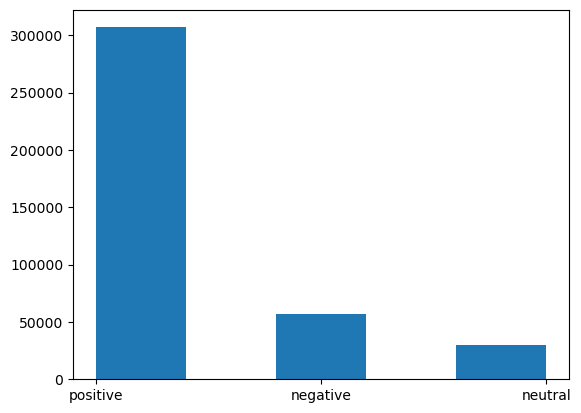

In [49]:
import matplotlib.pyplot as plt
df.Score.hist(bins=5, grid=False)
plt.show()

In [51]:
df['Text'].values[0]

'My daughter loves all the "Really Rosie" books. She was introduced to the Really Rosie CD performed by Carole King (also available on Amazon!) on her 1st Birthday and now, a year later, she knows all the songs. As far as the books go, we own: One Was Johnny, Alligators All Around, & Chicken Soup w/Rice. These books are well written with clever art work by Maurice Sendak. Plus, they are really cheap!! Highly recommended :)'

Removing irrelevant information (e.g., HTML tags, special characters).
Tokenization: Breaking the text into individual words or tokens.
Removing stop words (common words like “and,” “the,” etc. that don’t contribute much to sentiment).
Stemming or Lemmatization: Reducing words to their root form.

In [53]:
# Import Regular Expression
import re

# Function to remove HTML Tags
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [55]:
df['Text'] = df['Text'].apply(remove_html_tags)

C:\Users\Rehana\AppData\Local\Temp\ipykernel_10764\2326306115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(remove_html_tags)


In [57]:
sample1 = df['Text'].values[0]
sample2 = df['Text'].values[1000]
sample3 = df['Text'].values[1500]
sample4 = df['Text'].values[4900]

In [59]:
print(sample1)
print('-----------')
print(sample2)
print('-----------')
print(sample3)
print('-----------')
print(sample4)

My daughter loves all the "Really Rosie" books. She was introduced to the Really Rosie CD performed by Carole King (also available on Amazon!) on her 1st Birthday and now, a year later, she knows all the songs. As far as the books go, we own: One Was Johnny, Alligators All Around, & Chicken Soup w/Rice. These books are well written with clever art work by Maurice Sendak. Plus, they are really cheap!! Highly recommended :)
-----------
This kind of tastes like ice cream.  Unfortunately the similarities end there.The creamy texture that makes REAL ice cream feel good in your mouth must have been sucked out of the package along with the moisture back at the factory.Biting down on this stuff is like biting into a hardened piece of neopolitan-flavored insulating foam.  I found it to be a pretty gross sensation and had a hard time finishing the bar.Still, it's worth trying once!
-----------
 Length:: 3:57 MinsThis is your Cat on Kookamunga Krazee Kitty Catnip BubbleZ.Caution! Do not try this 

In [61]:

from bs4 import BeautifulSoup

text = '''
<td><a href="http://www.irit.fr/SC">Signal et Communication</a>
<br/><a href="http://www.irit.fr/IRT">Ingénierie Réseaux et Télécommunications</a>
</td>
'''

soup = BeautifulSoup(text)

print(soup.get_text())

Signal et Communication
Ingénierie Réseaux et Télécommunications




In [63]:
print(soup.get_text())

Signal et Communication
Ingénierie Réseaux et Télécommunications




In [65]:
print("Beforeconverting\n",'-----','\n',sample3,'\n')
sp = BeautifulSoup(sample3)
print("After usingbeautifulsoup\n",'-------','\n',sp.get_text())

Beforeconverting
 ----- 
  Length:: 3:57 MinsThis is your Cat on Kookamunga Krazee Kitty Catnip BubbleZ.Caution! Do not try this at home. Do not use with already deranged felines!You have been warned...  ;-/ 

After usingbeautifulsoup
 ------- 
 Length:: 3:57 MinsThis is your Cat on Kookamunga Krazee Kitty Catnip BubbleZ.Caution! Do not try this at home. Do not use with already deranged felines!You have been warned...  ;-/


C:\Users\Rehana\AppData\Local\Temp\ipykernel_10764\2807293828.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sp = BeautifulSoup(sample3)


In [67]:
import re
print(sample4)
s4 = re.sub('[^A-Za-z0-9]+', ' ', sample4)
print('-------')
print(s4)

I picked up a bottle of this stuff expecting the same old story; flashy packaging and a mediocre spicy sauce inside. I had 12 drops on a half-rack of babyback ribs this evening and it was incredible. By far the spiciest sauce I've ever tasted and with a great flavor to boot. I developed goose-bumps on my arms, my forehead was pouring sweat and my lips turned red while I was eating. What a rush! :^DProbably not for beginners but for the avid chili-head, this stuff is amazing!
-------
I picked up a bottle of this stuff expecting the same old story flashy packaging and a mediocre spicy sauce inside I had 12 drops on a half rack of babyback ribs this evening and it was incredible By far the spiciest sauce I ve ever tasted and with a great flavor to boot I developed goose bumps on my arms my forehead was pouring sweat and my lips turned red while I was eating What a rush DProbably not for beginners but for the avid chili head this stuff is amazing 


In [69]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rehana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
from nltk.corpus import stopwords
sw1 = stopwords.words('english')
print(sw1)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [73]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [75]:

#Applying all the concepts in the single function snippet
from tqdm import tqdm
final_processed_reviews = []
for txt in tqdm(df['Text'].values):
    txt = re.sub(r"http\S+", "", txt)
    txt = BeautifulSoup(txt, 'lxml').get_text()
    txt = decontracted(txt)
    txt = re.sub("\S*\d\S*", "", txt).strip()
    txt = re.sub('[^A-Za-z]+', ' ', txt)

    txt = ' '.join(e.lower() for e in txt.split() if e.lower() not in sw1)
    final_processed_reviews.append(txt.strip())

<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Rehana\AppData\Local\Temp\ipykernel_10764\3611143405.py:8: SyntaxWarning: invalid escape sequence '\S'
  txt = re.sub("\S*\d\S*", "", txt).strip()
  0%|                                                                             | 99/393871 [00:00<06:40, 982.81it/s]C:\Users\Rehana\AppData\Local\Temp\ipykernel_10764\3611143405.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  txt = BeautifulSoup(txt, 'lxml').get_text()
100%|████████████████████████████████████████████████████████████████████████| 393871/393871 [03:58<00:00, 1648.66it/s]


In [77]:
fpr = final_processed_reviews[0:5000]

In [79]:
fpr[0:10]

['daughter loves really rosie books introduced really rosie cd performed carole king also available amazon birthday year later knows songs far books go one johnny alligators around chicken soup w rice books well written clever art work maurice sendak plus really cheap highly recommended',
 'charming rhyming book describes circumstances eat chicken soup rice month month sounds like kind thing kids would make recess sing drive teachers crazy cute catchy sounds really childlike skillfully written',
 'set aside least hour day read son point consider connoisseur children books one best santa clause put tree since read perpetually loves first book taught months year second pleasure read well suited old children books worth owning borrowed library book however deserves permanent spot shelf sendak best',
 'remembered book childhood got kids good remembered kids love older daughter reads sister good rhymes nice pictures',
 'great book adorable illustrations true classic kids love poem music goe

In [81]:
df['Text'][0:10].values

array(['My daughter loves all the "Really Rosie" books. She was introduced to the Really Rosie CD performed by Carole King (also available on Amazon!) on her 1st Birthday and now, a year later, she knows all the songs. As far as the books go, we own: One Was Johnny, Alligators All Around, & Chicken Soup w/Rice. These books are well written with clever art work by Maurice Sendak. Plus, they are really cheap!! Highly recommended :)',
       "A charming, rhyming book that describes the circumstances under which you eat (or don't) chicken soup with rice, month-by-month. This sounds like the kind of thing kids would make up while they're out of recess and sing over and over until they drive the teachers crazy. It's cute and catchy and sounds really childlike but is skillfully written.",
       "I set aside at least an hour each day to read to my son (3 y/o). At this point, I consider myself a connoisseur of children's books and this is one of the best. Santa Clause put this under the tree. 

# BAG OF WORDS

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [85]:
cv = CountVectorizer()
cv.fit(fpr)
# print("featurenames",cv.get_feature_names()[0:10])
# print('-'*50)

# print('Type of bow cv ='  , type(bow_final))
# #From theoery we already knows bag of words will only have a unique words

# print('Unique words',bow_final.get_shape()[1])

CountVectorizer()

In [87]:
bow_final = cv.transform(fpr)

In [205]:
# bow_df = pd.DataFrame(bow_final.toarray(), columns=cv.get_feature_names_out())

In [89]:
print('shape of bow cv = ',bow_final.get_shape())

shape of bow cv =  (5000, 16359)


In [91]:
print("featurenames",cv.get_feature_names_out()[0:50])

featurenames ['aaaaa' 'aafco' 'ab' 'abandon' 'abandoned' 'abdomen' 'abdominal'
 'aberration' 'abide' 'abilities' 'ability' 'abk' 'able' 'ablity'
 'abnormal' 'abnormalities' 'abnormally' 'abour' 'abouttwo' 'abowt'
 'abraham' 'abrupt' 'abruptly' 'absence' 'absent' 'absolute' 'absolutely'
 'absolutley' 'absolutly' 'absorb' 'absorbed' 'absorbency' 'absorbent'
 'absorbing' 'absorbs' 'abstract' 'absurd' 'absurdity' 'abundance'
 'abundant' 'abuse' 'abused' 'abusing' 'abysmal' 'ac' 'accedient'
 'accelerated' 'accent' 'accented' 'accenting']


In [195]:
# final_processed_reviews

In [93]:
print('Type of bow cv ='  , type(bow_final))

Type of bow cv = <class 'scipy.sparse._csr.csr_matrix'>


In [95]:
print('Unique words',bow_final.get_shape()[1])

Unique words 16359


In [97]:
bow_final.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# bigram ngram

In [99]:
cv = CountVectorizer(ngram_range=(1,2),min_df = 10)
fngrcv = cv.fit_transform(fpr)
print('Type of ngram  cv',type(fngrcv))
print('Shape of ngram  cv',fngrcv.get_shape())
print('Number of unique words ',fngrcv.get_shape()[1])

Type of ngram  cv <class 'scipy.sparse._csr.csr_matrix'>
Shape of ngram  cv (5000, 3667)
Number of unique words  3667


In [105]:
tf_idf_cv = TfidfVectorizer(ngram_range=(1,2),min_df=10)
ftfidfcv = tf_idf_cv.fit_transform(fpr)
print('Type of tf_idf_cv',type(ftfidfcv))
print('Shape of tf_idf_cv',ftfidfcv.get_shape())
print('No of unique words in unigram & Bigram',ftfidfcv.get_shape()[1])

Type of tf_idf_cv <class 'scipy.sparse._csr.csr_matrix'>
Shape of tf_idf_cv (5000, 3667)
No of unique words in unigram & Bigram 3667


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

Word2vec

In [107]:
#convert the sentence into to word so that w2v can convert into dimensions
i = 0
#list of words 
word = []
for w in fpr:
    word.append(w.split())
    i = i+1

In [109]:
word

[['daughter',
  'loves',
  'really',
  'rosie',
  'books',
  'introduced',
  'really',
  'rosie',
  'cd',
  'performed',
  'carole',
  'king',
  'also',
  'available',
  'amazon',
  'birthday',
  'year',
  'later',
  'knows',
  'songs',
  'far',
  'books',
  'go',
  'one',
  'johnny',
  'alligators',
  'around',
  'chicken',
  'soup',
  'w',
  'rice',
  'books',
  'well',
  'written',
  'clever',
  'art',
  'work',
  'maurice',
  'sendak',
  'plus',
  'really',
  'cheap',
  'highly',
  'recommended'],
 ['charming',
  'rhyming',
  'book',
  'describes',
  'circumstances',
  'eat',
  'chicken',
  'soup',
  'rice',
  'month',
  'month',
  'sounds',
  'like',
  'kind',
  'thing',
  'kids',
  'would',
  'make',
  'recess',
  'sing',
  'drive',
  'teachers',
  'crazy',
  'cute',
  'catchy',
  'sounds',
  'really',
  'childlike',
  'skillfully',
  'written'],
 ['set',
  'aside',
  'least',
  'hour',
  'day',
  'read',
  'son',
  'point',
  'consider',
  'connoisseur',
  'children',
  'books',

In [266]:
!pip install gensim

In [274]:
! pip install --upgrade scipy

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   -- ------------------------------------- 2.4/44.5 MB 12.3 MB/s eta 0:00:04
   --- ------------------------------------ 4.2/44.5 MB 12.0 MB/s eta 0:00:04
   ------ --------------------------------- 7.6/44.5 MB 12.1 MB/s eta 0:00:04
   -------- ------------------------------- 10.0/44.5 MB 12.2 MB/s eta 0:00:03
   ---------- ----------------------------- 11.3/44.5 MB 12.2 MB/s eta 0:00:03
   ---------- ----------------------------- 11.3/44.5 MB 12.2 MB/s eta 0:00:03
   ---------- ----------------------------- 11.3/44.5 MB 12.2 MB/s eta 0:00:03
   ---------- ----------------------------- 11.3/44.5 MB 12.2 MB/s eta 0:00:03
   ---------- ----------------------------- 11.3/44.5 MB 12.2 MB/s eta 0:00:03
   ---------- ----------------------------- 11.3/44.5 MB 12.2 MB/s eta 0:00:03
   ---------- ----------------------------- 11.3/44.5 MB 12.2 MB/s eta 0:00:03
   ---------- ----------------------------- 11.3/44.5 MB 12.2 MB

  You can safely remove it manually.


In [111]:
from gensim.models import Word2Vec
# from gensim.models import KeyedVectors

In [113]:
w2v = Word2Vec(word,min_count=5,vector_size=100,workers=4)
print(w2v.wv.most_similar('good'))
print('-'*50)
print(w2v.wv.most_similar('worst'))

[('much', 0.9911582469940186), ('really', 0.9895766377449036), ('great', 0.987716555595398), ('better', 0.9862080812454224), ('want', 0.9793398976325989), ('like', 0.9776718616485596), ('think', 0.9770495295524597), ('quality', 0.9756760597229004), ('stuff', 0.9740048050880432), ('high', 0.972577691078186)]
--------------------------------------------------
[('style', 0.9989732503890991), ('glucosamine', 0.9989730715751648), ('switching', 0.9989516139030457), ('become', 0.9989354610443115), ('heard', 0.9989217519760132), ('name', 0.9989208579063416), ('ask', 0.998907744884491), ('various', 0.9988865852355957), ('pets', 0.9988762736320496), ('friends', 0.9988650679588318)]


In [115]:
len(list((w2v.wv[1])))

100

In [117]:
w2vlst = list(w2v.wv.key_to_index)
print("number of words that occured minimum 5 times ",len(w2vlst))
print('-'*50)
print('Sample words occured :',w2vlst[0:10])

number of words that occured minimum 5 times  4867
--------------------------------------------------
Sample words occured : ['food', 'one', 'like', 'would', 'good', 'great', 'get', 'product', 'dog', 'cat']


In [283]:
! pip install scipy

In [287]:
! pip install --upgrade scipy

In [289]:
! pip install scipy gensim

In [ ]:
! pip uninstall scipy

In [119]:
text=['This is introduction to NLP','It is likely to be useful,to people ','Machine learning is the new electrcity','Therewould be less hype around AI and more action goingforward','python is the best tool!','R is good langauage','Ilike this book','I want more books like this']

In [121]:
#convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})
df.head()

,tweet
0,This is introduction to NLP
1,"It is likely to be useful,to people"
2,Machine learning is the new electrcity
3,Therewould be less hype around AI and more act...
4,python is the best tool!


# Converting Text Data to Lowercase

In [123]:
x = 'Testing'
x2 = x.lower()
print(x2)

testing


In [125]:
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,tweet
0,this is introduction to nlp
1,"it is likely to be useful,to people"
2,machine learning is the new electrcity
3,therewould be less hype around ai and more act...
4,python is the best tool!


# Removing Punctuation

In [147]:
text=['This is introduction to NLP','It is likely to be useful,to people ','Machine learning is the new electrcity',
'There would be less hype around AI and more action goingforward','python is the best tool!','R is good langauage','I like this book','I want more books like this']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
df

,tweet
0,This is introduction to NLP
1,"It is likely to be useful,to people"
2,Machine learning is the new electrcity
3,There would be less hype around AI and more ac...
4,python is the best tool!
5,R is good langauage
6,I like this book
7,I want more books like this


In [131]:
import re
s = "I. like. This book!"
s1 = re.sub(r'[^\w\s]',"",s)

In [133]:
s1

'I like This book'

In [139]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]',"")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Rehana\AppData\Local\Temp\ipykernel_10764\3665916657.py:1: SyntaxWarning: invalid escape sequence '\w'
  df['tweet'] = df['tweet'].str.replace('[^\w\s]',"")


,tweet
0,This is introduction to NLP
1,"It is likely to be useful,to people"
2,Machine learning is the new electrcity
3,There would be less hype around AI and more ac...
4,python is the best tool!


In [141]:
import string
s = "I. like. This book!"
for c in string.punctuation:
    s= s.replace(c,"")

In [143]:
s

'I like This book'

# Removing Stop Words

In [150]:
text=['This is introduction to NLP','It is likely to be useful,to people ','Machine learning is the new electrcity',
'There would be less hype around AI and more action goingforward','python is the best tool!','R is good langauage','I likethis book','I want more books like this']

In [154]:
#convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})
df

,tweet
0,This is introduction to NLP
1,"It is likely to be useful,to people"
2,Machine learning is the new electrcity
3,There would be less hype around AI and more ac...
4,python is the best tool!
5,R is good langauage
6,I likethis book
7,I want more books like this


In [156]:
import nltk
from nltk.corpus import stopwords

In [158]:
#remove stop words
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [160]:
df

,tweet
0,This introduction NLP
1,"It likely useful,to people"
2,Machine learning new electrcity
3,There would less hype around AI action goingfo...
4,python best tool!
5,R good langauage
6,I likethis book
7,I want books like


In [164]:
type(stop)

list

# TEXT STANDARDIZATION

In [167]:
lookup_dict = {'nlp':'natural language processing','ur':'your', "wbu" : "what about you"}

In [169]:
print(lookup_dict)
import re

{'nlp': 'natural language processing', 'ur': 'your', 'wbu': 'what about you'}


In [171]:
def text_std(input_text, lookup_dict):
    words = input_text.split()
    new_words = []
    
    for word in words:
        # Remove any non-word and non-space characters from the word
        word = re.sub(r'[^\w\s]', "", word)
        
        if word.lower() in lookup_dict:
            # If the lowercase version of the word is found in the lookup_dict,
            # replace it with the corresponding value from the dictionary
            word = lookup_dict[word.lower()]
            
        new_words.append(word)
    
    new_text = " ".join(new_words)
    return new_text

In [173]:
text_std("I like nlp it's ur choice",lookup_dict)

'I like natural language processing its your choice'